In [5]:
!pip install -r requirements.txt

  Using cached pandas-2.2.3-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached pvlib-0.11.2-py3-none-any.whl.metadata (2.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 19.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 23.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 23.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 23.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 21.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 20.2 MB/s eta 0:00:00a 0:00:01


In [6]:
import os
import pandas as pd
import pvlib
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
from os import walk
from datetime import datetime

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

DATA_DIR = "data/"

In [57]:
# Convert string to DataFrame
# df = pd.read_csv(pd.StringIO(data_str), sep='\t')
df = pd.read_csv(os.path.join(DATA_DIR, "SART_" + str(3).zfill(2) + ".txt"), header=0, sep="\t")

# Create time index
df.index = pd.RangeIndex(start=0, stop=len(df), name='Time')

In [58]:
df.head(10)

,GYROX,GYROY,GYROZ,ACCX,ACCY,ACCZ,GYROTEMPSX1,GYROTEMPSY1,GYROTEMPSZ1,GYROTEMPSX2,GYROTEMPSY2,GYROTEMPSZ2,BOARDTEMP,GAIN,PINFET_POWER,PBFM,ASE_POWER,ILASER,TLASER,TEC_CURRENT
Time,,,,,,,,,,,,,,,,,,,,
0,-421.8825,-404.2850,473.8630,-58141.695,-44055.725,-3410291.195,5.538064,5.749393,5.562532,5.570786,5.835037,5.750136,25.480785,1.335987,2.966507,78.457224,2.477337,159.989613,24.666503,-46.824120
1,-387.4135,-392.9730,472.5495,-58123.865,-44066.970,-3410290.735,5.537958,5.749309,5.562397,5.570630,5.834873,5.749994,25.482051,1.335980,2.965627,78.398971,2.476381,160.006891,24.665564,-46.692401
2,-393.0215,-401.8730,461.8185,-58127.270,-44022.785,-3410306.865,5.537901,5.749279,5.562321,5.570520,5.834792,5.749799,25.482050,1.335889,2.966522,78.409678,2.477979,160.020421,24.664739,-46.967228
3,-402.8495,-401.3750,475.1165,-58154.870,-44031.730,-3410288.520,5.537846,5.749172,5.562229,5.570416,5.834725,5.749737,25.482691,1.335910,2.966681,78.433429,2.477629,160.018392,24.664722,-46.923872
4,-409.5605,-415.6205,461.7755,-58115.560,-43992.980,-3410291.375,5.537739,5.749159,5.562223,5.570313,5.834623,5.749717,25.480448,1.335978,2.966062,78.441823,2.475994,159.978227,24.664600,-46.615584
5,-409.0265,-403.7755,475.8200,-58100.135,-44024.115,-3410288.605,5.537620,5.749046,5.562135,5.570290,5.834575,5.749674,25.482415,1.336004,2.966287,78.445428,2.477913,159.957035,24.663623,-46.751703
6,-402.3065,-405.3730,471.9695,-58154.080,-44054.315,-3410297.710,5.537599,5.749009,5.562046,5.570176,5.834502,5.749539,25.480591,1.335899,2.966191,78.432678,2.479153,160.025949,24.663956,-46.955290
7,-393.9605,-390.3545,464.5145,-58118.635,-44081.795,-3410286.795,5.537491,5.748897,5.562013,5.570087,5.834432,5.749522,25.480711,1.335912,2.966475,78.462390,2.478835,159.988907,24.665351,-46.932589
8,-410.1370,-392.5550,475.4225,-58101.950,-44085.020,-3410298.320,5.537479,5.748771,5.561965,5.570091,5.834357,5.749436,25.481948,1.335976,2.966239,78.413145,2.476936,160.050004,24.664844,-46.856402


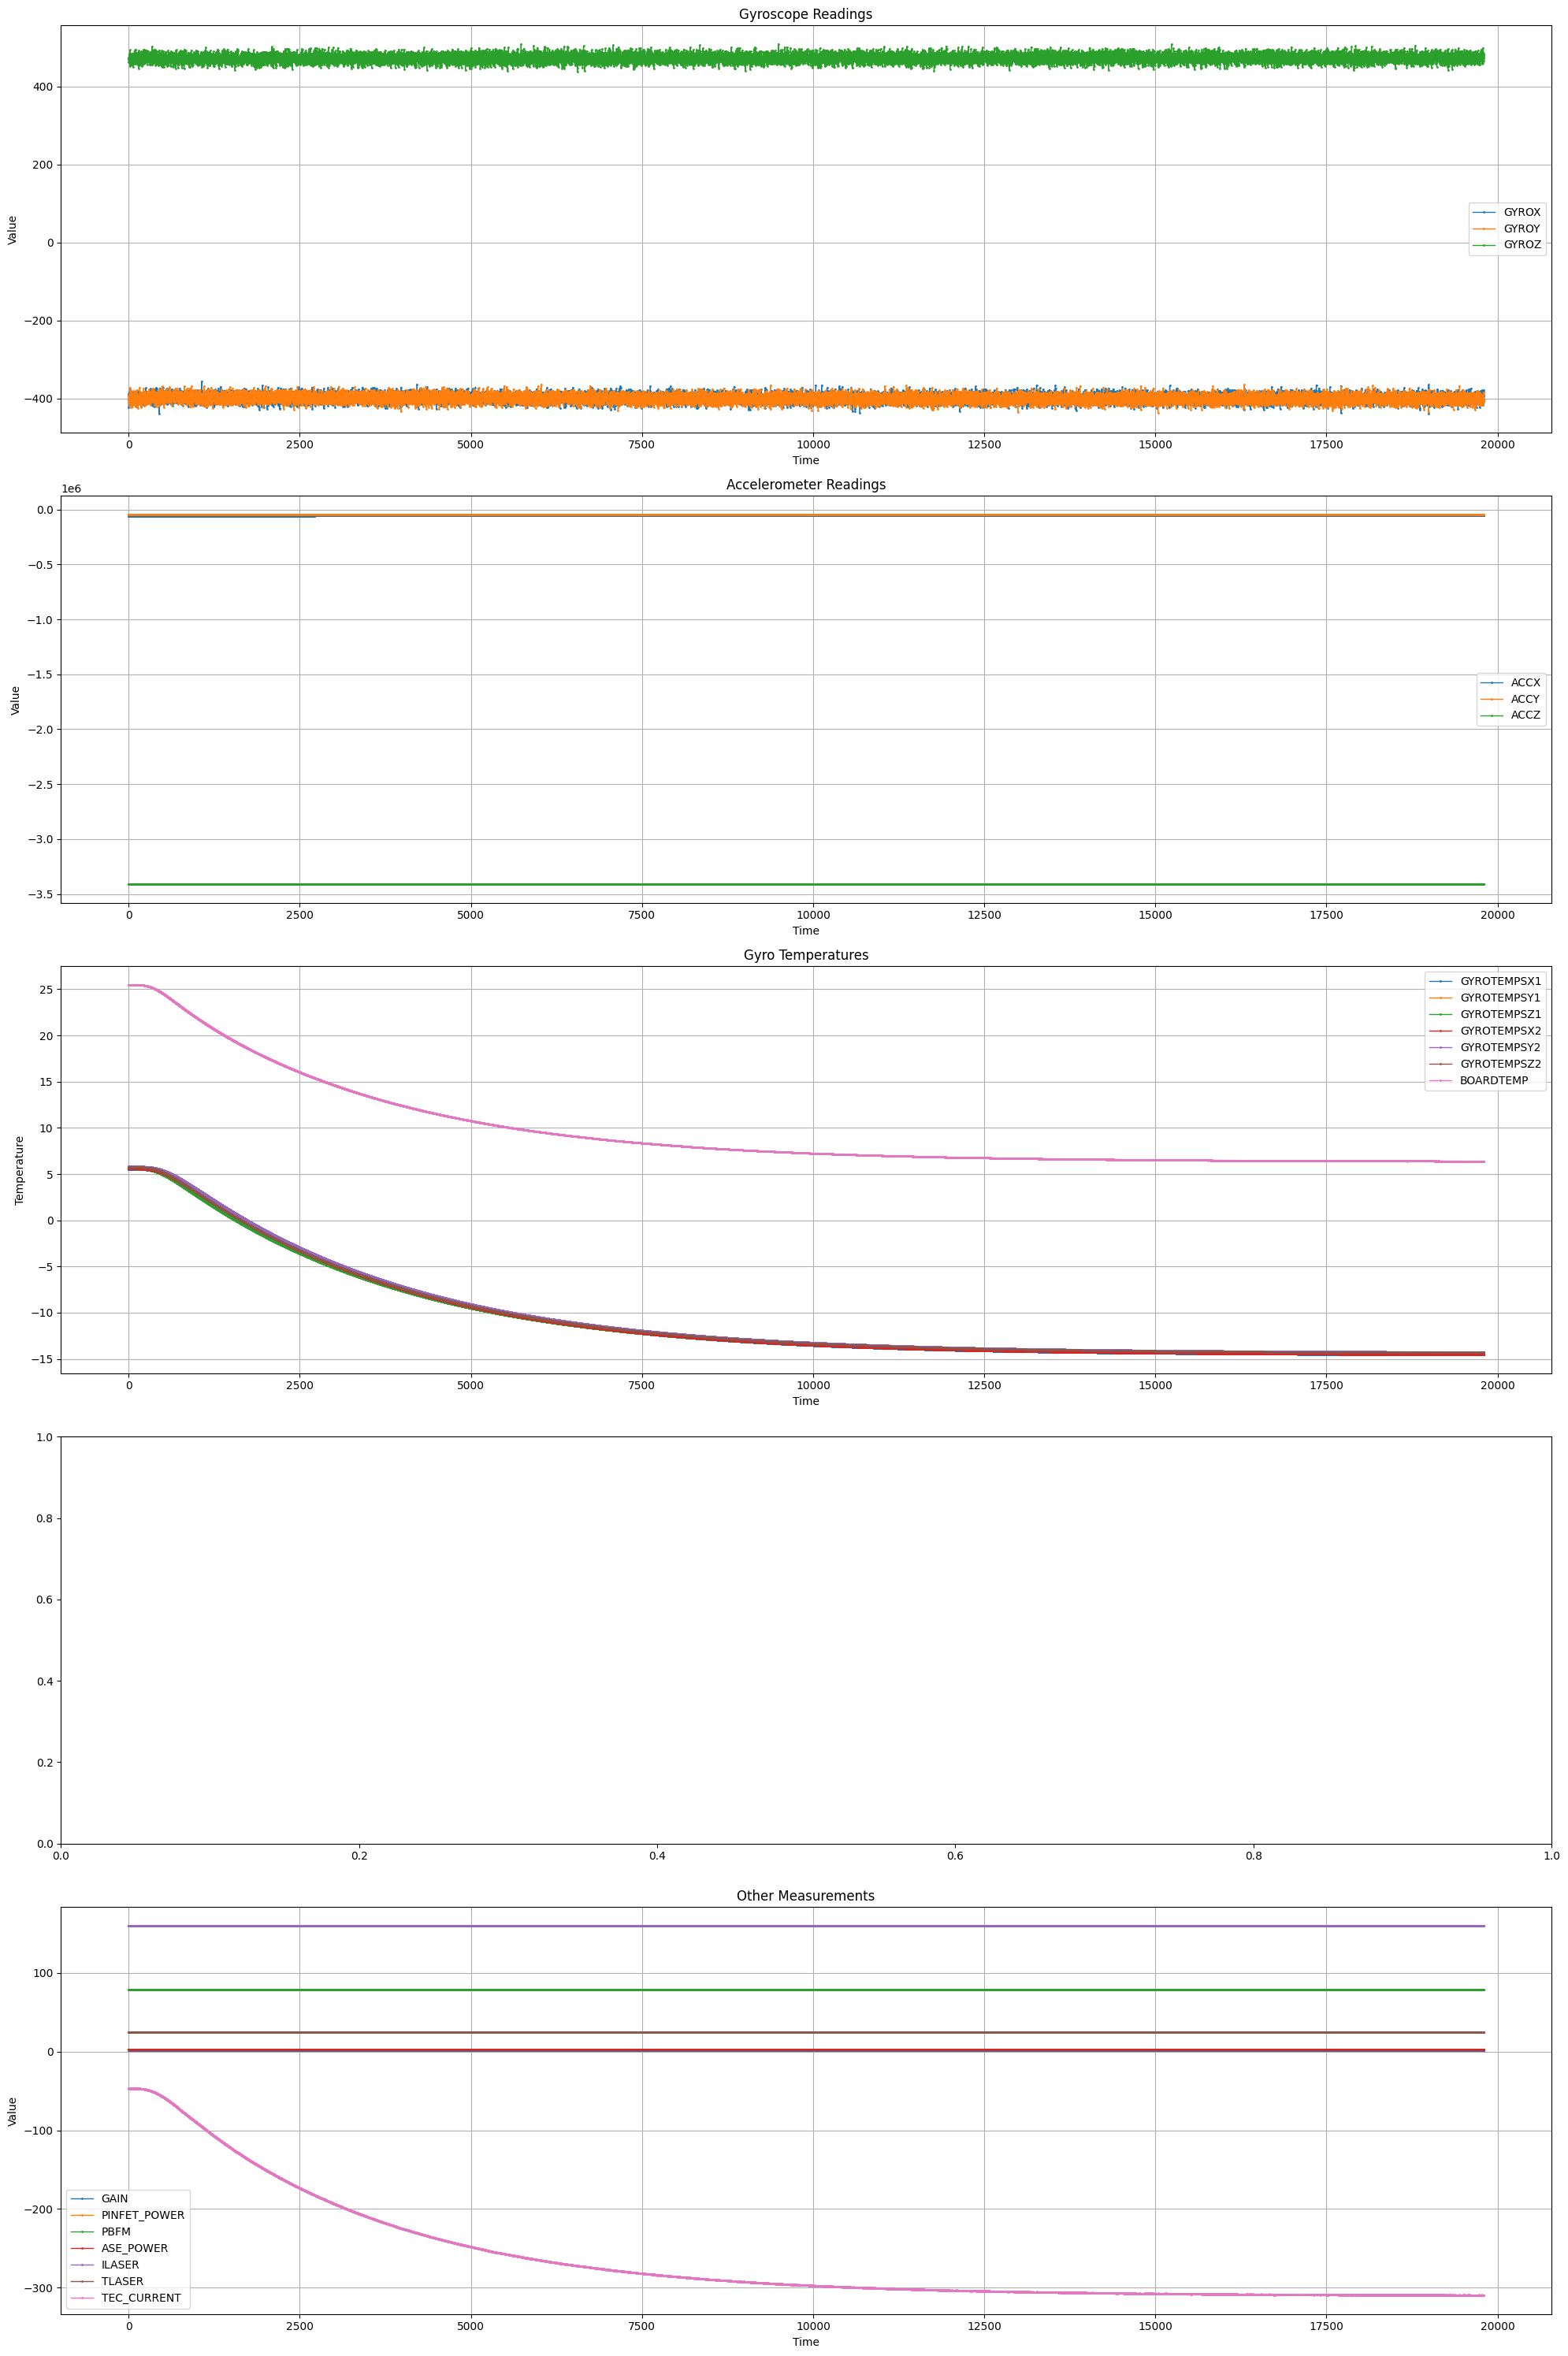

In [59]:
# Create subplots for different groups of measurements
# plt.style.use('seaborn')
fig, axes = plt.subplots(5, 1, figsize=(20, 30))

# Group 1: Gyroscope readings
df[['GYROX', 'GYROY', 'GYROZ']].plot(ax=axes[0], marker='o', linewidth=1, markersize=1)
# df[['GYROX', 'GYROY']].plot(ax=axes[0], marker='o', linewidth=1, markersize=1)
axes[0].set_title('Gyroscope Readings')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')
axes[0].grid(True)

# Group 2: Accelerometer readings
df[['ACCX', 'ACCY', 'ACCZ']].plot(ax=axes[1], marker='o', linewidth=1, markersize=1)
axes[1].set_title('Accelerometer Readings')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Value')
axes[1].grid(True)

# Group 3: Gyro Temperatures Set 1-2
df[['GYROTEMPSX1', 'GYROTEMPSY1', 'GYROTEMPSZ1','GYROTEMPSX2', 'GYROTEMPSY2', 'GYROTEMPSZ2', 'BOARDTEMP']].plot(ax=axes[2], marker='o', linewidth=1, markersize=1)
axes[2].set_title('Gyro Temperatures')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Temperature')
axes[2].grid(True)

'''
# Group 4: Gyro Temperatures Set 2
df[['GYROTEMPSX2', 'GYROTEMPSY2', 'GYROTEMPSZ2']].plot(ax=axes[3], marker='o', linewidth=1, markersize=1)
axes[3].set_title('Gyro Temperatures Set 2')
axes[3].set_xlabel('Time')
axes[3].set_ylabel('Temperature')
axes[3].grid(True)
'''

# Group 5: Other Measurements
df[['GAIN', 'PINFET_POWER', 'PBFM', 'ASE_POWER', 'ILASER', 'TLASER', 'TEC_CURRENT']].plot(ax=axes[4], marker='o', linewidth=1, markersize=1)
axes[4].set_title('Other Measurements')
axes[4].set_xlabel('Time')
axes[4].set_ylabel('Value')
# axes[4].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[4].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

---

---

mean: -398.5082581957453 std: 9.172554339403485
mean: -399.12877601272857 std: 9.23103204089227
mean: -398.4890337155268 std: 8.859712902778897
mean: -398.5115024243649 std: 9.024481400027513
mean: -397.9947229658064 std: 9.08414366233747
mean: -398.52728890348 std: 8.975784176138735
mean: -398.4855677341145 std: 9.060740724192447
mean: -398.71449093342767 std: 8.730356920483858
mean: -398.92688046772406 std: 8.903357821199586
mean: -400.16567372089503 std: 9.354635014649727
mean: -400.9272326380121 std: 9.227594505063726
mean: -399.16013433175067 std: 9.439190663650937


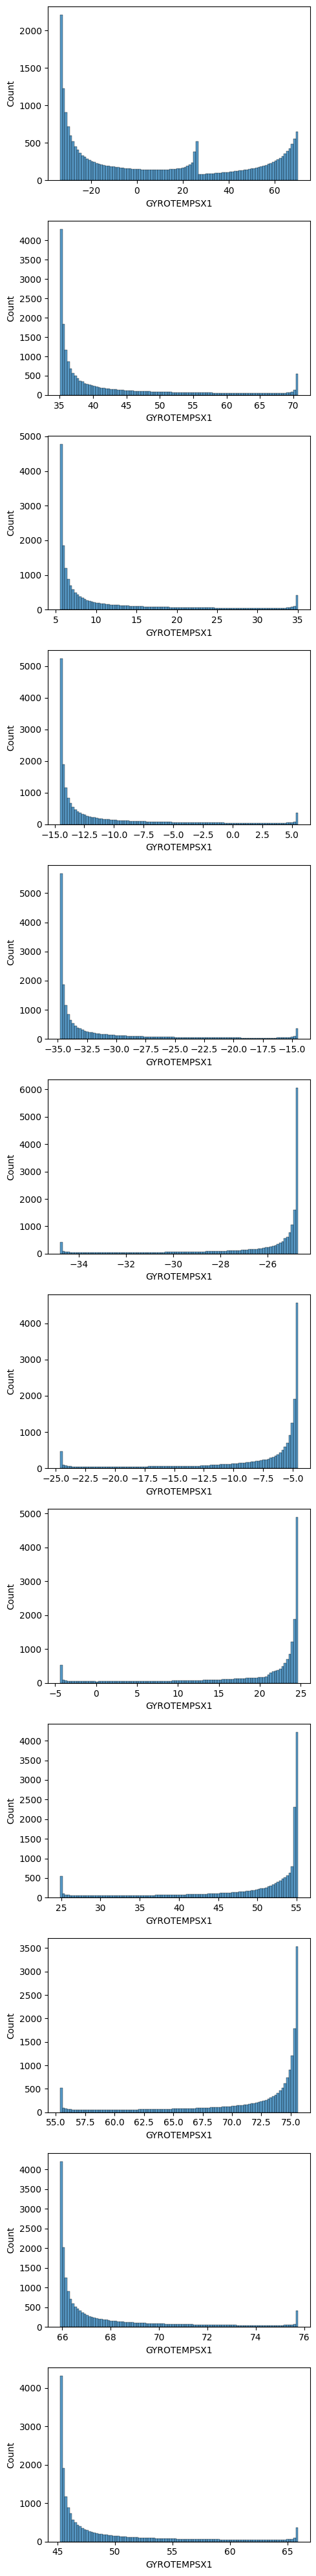

In [7]:
fig, axes = plt.subplots(12, 1, figsize=(5, 40)) 

for i in range(12):
    df_aob = pd.read_csv(os.path.join(DATA_DIR, "SART_" + str(i).zfill(2) + ".txt"), header=0, sep="\t")

    aob_stats = df_aob.describe()
    print(f"""mean: {aob_stats['GYROX']['mean']} std: {aob_stats['GYROX']['std']}""")
    
    sns.histplot(df_aob['GYROTEMPSX1'], kde=False, ax=axes[i], bins=100)

plt.tight_layout()
plt.show()

035 > mean: -398.27 std: 8.89
005 > mean: -398.84 std: 8.92
-14 > mean: -398.85 std: 9.0
-34 > mean: -398.35 std: 9.1
-24 > mean: -398.56 std: 9.01
-04 > mean: -398.05 std: 9.12
024 > mean: -398.65 std: 8.64
054 > mean: -399.08 std: 8.99
075 > mean: -400.98 std: 9.47
066 > mean: -400.79 std: 9.23
045 > mean: -398.28 std: 9.42


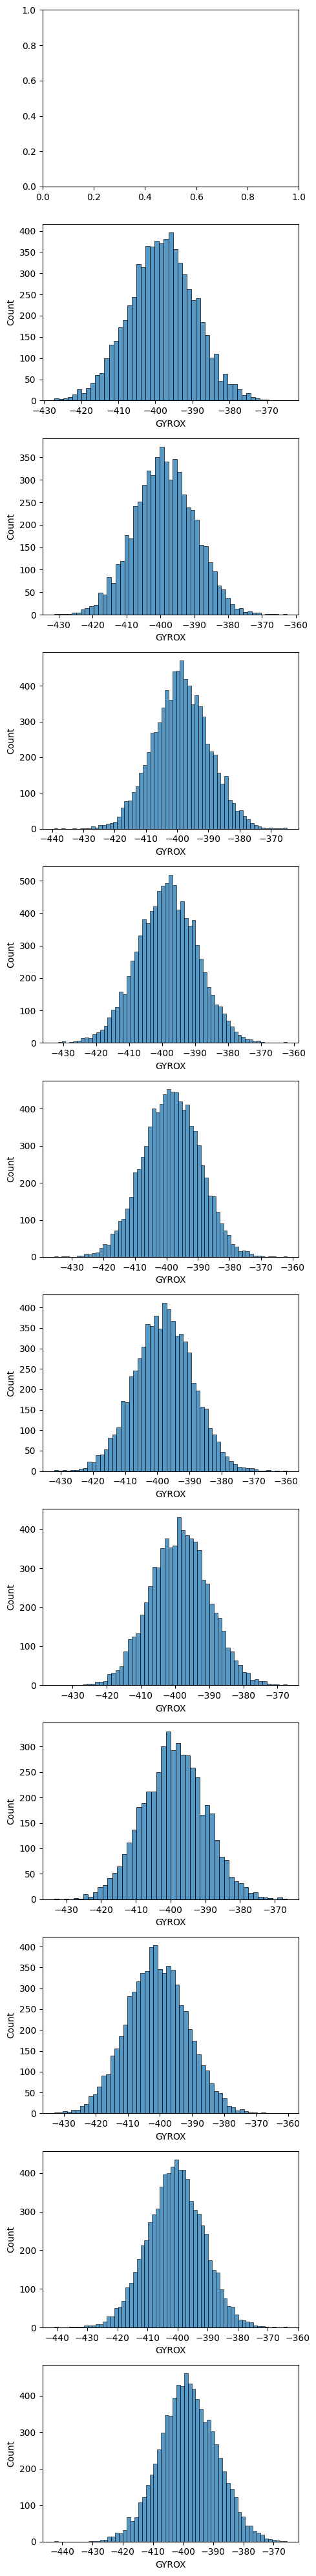

In [303]:
# DEBUG
mean_true = -400
std_true = 1

fig, axes = plt.subplots(12, 1, figsize=(5, 40)) 
df_aob = pd.DataFrame()

for data_num in range(1,12):
    # data_num = 2
    df_aob = pd.read_csv(os.path.join(DATA_DIR, "SART_" + str(data_num).zfill(2) + ".txt"), header=0, sep="\t")
    
    df_aob['GYROTEMPSX1'] = df_aob['GYROTEMPSX1'].map(lambda x: int(x))
    main_temp = df_aob['GYROTEMPSX1'].value_counts().head(1).keys()[0]
    df_aob = df_aob[df_aob['GYROTEMPSX1'] == main_temp]

    col_name = 'GYROX'
    aob_stats = df_aob.describe()
    mean = aob_stats[col_name]['mean']
    std = aob_stats[col_name]['std']
    # skew = aob_stats['GYROX'].skew()
    print(f"""{str(main_temp).zfill(3)} > mean: {round(mean,2)} std: {round(std,2)}""")
    
    # z = (mean_true - mean) / (std_true**2 + std**2)
    # p_value = stats.norm.sf(abs(z)) * 2
    # print(f"""{main_temp}: {skew}""")

    
    
    sns.histplot(df_aob[col_name], kde=False, ax=axes[data_num])
    
plt.tight_layout()
plt.show()

In [187]:
'''
def calc_err(val, max_range, min_range, mean):
    if (val > min_range) and (val < max_range):
        # return(abs(mean-val))
        return(0)
    else:
        if (abs(max_range-val) < abs(min_range-val)):
            return max_range-val
        else:
            return min_range-val

for column_name in ["GYROX", "GYROY", "GYROZ"]:
    aob_stats = df_aob.describe()
    min_range = aob_stats[column_name]['25%']
    max_range = aob_stats[column_name]['75%']
    mean = aob_stats[column_name]['mean']
    df_aob[column_name] = df_aob[column_name].map(lambda x: calc_err(x, max_range, min_range, mean))

'''
for column_name in ["GYROTEMPSX1", "GYROTEMPSY1", "GYROTEMPSZ1", "GYROTEMPSX2", "GYROTEMPSY2", "GYROTEMPSZ2","BOARDTEMP"]:
    df_aob[column_name] = df_aob[column_name].map(lambda x: int(x))

In [194]:
df_aob['GYROTEMPSX1'].value_counts() 

{-32: 1489,
 -33: 1297,
 -31: 1029,
 -30: 797,
 25: 747,
 -29: 651,
 69: 597,
 -28: 553,
 68: 513,
 -27: 481,
 67: 454,
 -26: 425,
 66: 407,
 -25: 382,
 65: 369,
 -24: 348,
 64: 338,
 -23: 319,
 63: 312,
 -22: 297,
 62: 288,
 0: 286,
 -21: 276,
 61: 270,
 -20: 261,
 24: 252,
 60: 251,
 -19: 245,
 59: 236,
 -18: 233,
 58: 223,
 -17: 222,
 -16: 213,
 57: 211,
 70: 210,
 23: 209,
 -15: 205,
 56: 200,
 -14: 196,
 -13: 191,
 55: 190,
 22: 189,
 -12: 185,
 54: 181,
 -11: 180,
 21: 176,
 -10: 175,
 53: 173,
 -9: 172,
 -8: 168,
 52: 166,
 20: 165,
 -7: 165,
 -6: 161,
 19: 160,
 51: 159,
 -5: 158,
 -4: 156,
 18: 154,
 -3: 152,
 50: 152,
 17: 149,
 -2: 149,
 16: 147,
 -1: 147,
 49: 147,
 15: 144,
 14: 142,
 48: 141,
 1: 140,
 3: 138,
 2: 138,
 13: 138,
 12: 137,
 47: 136,
 10: 136,
 11: 136,
 4: 135,
 8: 135,
 5: 135,
 6: 134,
 9: 134,
 7: 134,
 46: 132,
 45: 127,
 44: 123,
 43: 120,
 42: 116,
 41: 112,
 40: 109,
 39: 106,
 38: 103,
 37: 100,
 36: 98,
 35: 95,
 34: 93,
 33: 91,
 32: 88,
 31: 87,

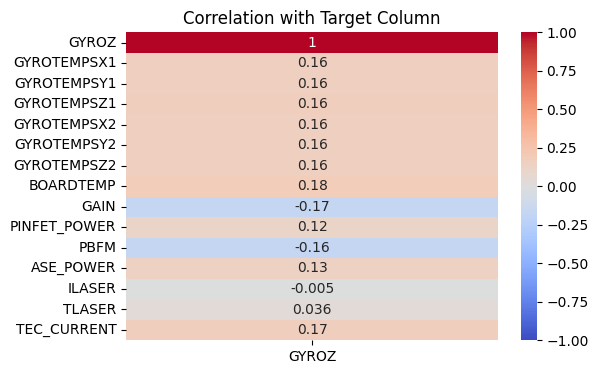

In [171]:
target_col_name = 'GYROZ'
rel_columns = [target_col_name,
               'GYROTEMPSX1', 'GYROTEMPSY1', 'GYROTEMPSZ1', 'GYROTEMPSX2', 'GYROTEMPSY2',
               'GYROTEMPSZ2', 'BOARDTEMP', 'GAIN', 'PINFET_POWER', 'PBFM', 'ASE_POWER',
               'ILASER', 'TLASER', 'TEC_CURRENT']
df_gyrox = df_aob[rel_columns]
correlation_matrix = df_gyrox.corr()

'''
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
'''

# Extract correlation of 'TargetColumn' with other columns
target_correlations = correlation_matrix[[target_col_name]]
 -398.27 std: 8.89
# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(target_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Target Column')
plt.show()


---